# Importing Necessary Libraries

In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold,GridSearchCV, train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Defining Functions

In [2]:
#Function to create plots 
def Create_Plots(data,X,Y,Type,category=False):
    if Type==1:
        print("Correlation Plot\n")
        plt.figure(figsize=(18,10))
        sns.heatmap(data.corr(), annot=True)
        plt.show()
    
    if Type==2:
        print("Individual Comparison\n")
        if category == False:
            for i in X.columns:
                plt.figure()
                plt.tight_layout()
                sns.stripplot(x=Y,y=i,data=data)
                plt.title(label=f'Strip plot for {i}', size=12)
                plt.show()
        else:          
            for i in data.columns:
                plt.figure(figsize=(5,5))
                plt.tight_layout()
                sns.catplot(i, data=data, kind="count",height = 5,aspect = 2, palette="magma_r")
                plt.title(label=f'Count plot for {i}', size=12)
                plt.show()
    
    if Type==3:
        print("Visualiztion using TSNE\n")
        tsne = TSNE(n_components=2,random_state=123)
        z = tsne.fit_transform(X)
        df = pd.DataFrame()
        df["y"] = Y
        df["comp-1"] = z[:,0]
        df["comp-2"] = z[:,1]
    
        plt.figure(figsize=(10,5))
        sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
               palette=sns.color_palette("bright", len(Y.unique())),
                data=df).set(title="T-SNE projection") 
        plt.show()    

In [3]:
#function for scaling the data
def scale_data(df):
    array = np.array(df)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(array)
    scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
    return scaled_data

In [4]:
# function to visualize the accuracy at different values of parameters
def plot_for_best_parameter(xtrain,ytrain):
    # choose k between 1 to 41
    k_range = range(1,50,2)
    p = (1,2)
    for i in p:
        k_scores = []
        # use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k,p=i)
            scores = cross_val_score(knn, xtrain, ytrain, cv=5)
            k_scores.append(scores.mean())
        # plot to see clearly
        plt.plot(k_range, k_scores, marker = "*")
        plt.xlabel('Value of K for KNN')
        plt.ylabel('Cross-Validated Accuracy')
        plt.title(label=f'for p = {i}', size=15)
        plt.show()

In [5]:
# function to find the best parameters using GridSearchCV
def grid_search_cv(xtrain,ytrain):
    n_neighbors = np.array(range(1,50,2))
    p=np.array([1,2])
    param_grid = dict(n_neighbors=n_neighbors,p=p)  
    model = KNeighborsClassifier()
    grid = GridSearchCV(estimator=model, param_grid=param_grid)
    grid.fit(xtrain, ytrain)
    print(grid.best_params_)

In [6]:
#function to visualize confusion matrix
def Conf_mat(y_test,y_pred):
    confusionmatrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix)
    cm_display.plot()
    plt.show() 

In [7]:
# function to show roc curve and Auc for multiclass
def roc_auc(target,y_test,y_pred): 
#     target= [1,2,3,5,6,7]

    # set plot figure size
    fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

    # function for scoring roc auc score for multi-class
    def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)

        for (idx, c_label) in enumerate(target):
            fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
            c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
        return roc_auc_score(y_test, y_pred, average=average)

    print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(y_test, y_pred)} \n\n')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    plt.show()

# Data : glass

## Importing the data

In [8]:
glass = pd.read_csv("D:\Study\Excelr DS\Assignments\AS-13-KNN\glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

#### Type: Type of glass: (class attribute)

 * 1 --> building_windows_float_processed
 * 2 --> building_windows_non_float_processed
 * 3 --> vehicle_windows_float_processed
 * 4 --> vehicle_windows_non_float_processed (none in this database)
 * 5 --> containers
 * 6 --> tableware 
 * 7 --> headlamps

## Initial Analysis

In [9]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
for i in glass["Type"].unique():
    print(glass[glass.Type==i])

         RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  Type
0   1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.0  0.00     1
1   1.51761  13.89  3.60  1.36  72.73  0.48   7.83  0.0  0.00     1
2   1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.0  0.00     1
3   1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.0  0.00     1
4   1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.0  0.00     1
..      ...    ...   ...   ...    ...   ...    ...  ...   ...   ...
65  1.52099  13.69  3.59  1.12  71.96  0.09   9.40  0.0  0.00     1
66  1.52152  13.05  3.65  0.87  72.22  0.19   9.85  0.0  0.17     1
67  1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.0  0.17     1
68  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.0  0.16     1
69  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03     1

[70 rows x 10 columns]
          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
70   1.51574  14.86  3.67  1.74  71.87  0.16  7.36  0.00  0.12     2
71   1.51848  13.64  3

## Visualization

In [12]:
X = glass.iloc[:,0:9]
Y = glass.iloc[:,-1]

### 1. Correlation Plot:

Correlation Plot



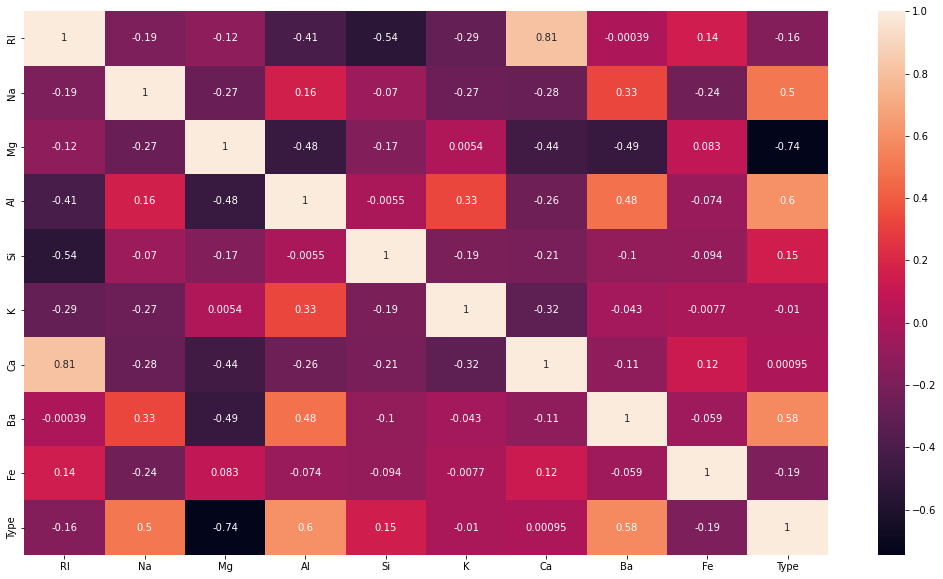

In [13]:
#calling the function
Create_Plots(glass,X,Y,Type=1)

### 2. Plots showing individual comparison :

Individual Comparison



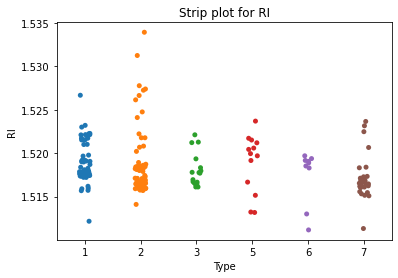

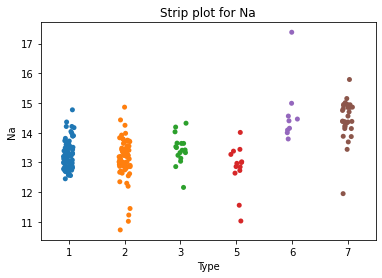

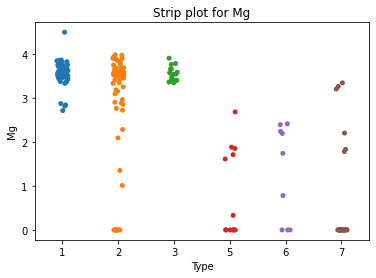

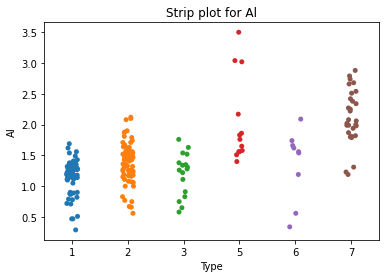

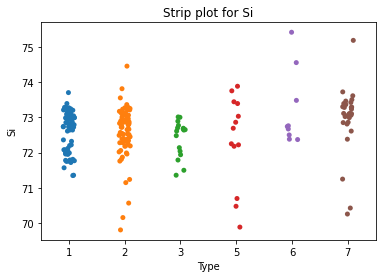

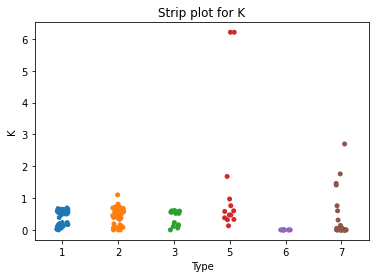

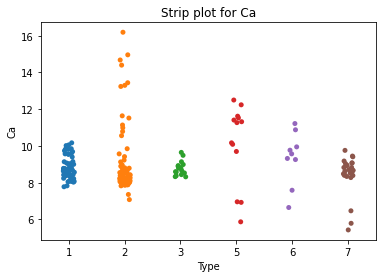

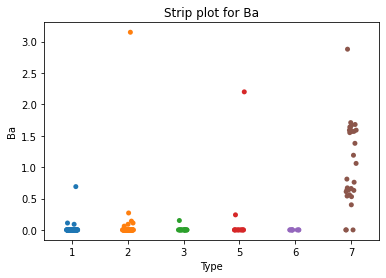

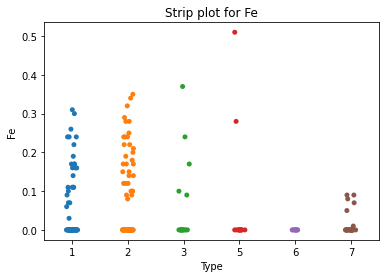

In [14]:
#calling the function
Create_Plots(glass,X,Y,Type=2)

### 3. Visualizing using tSne

Visualiztion using TSNE



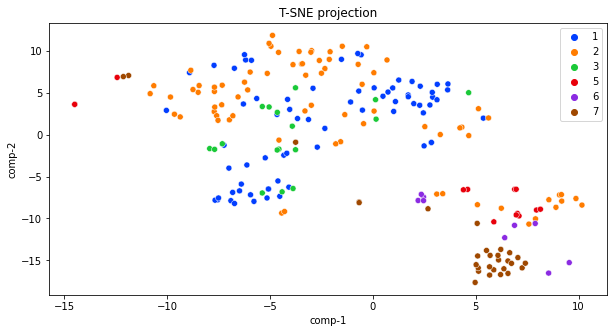

In [15]:
#calling the function
Create_Plots(glass,X,Y,Type=3)

## Scaling the data

In [16]:
#calling the function
scaled_data = scale_data(glass)
scaled_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


## Defining independent and dependent variables

In [17]:
x  = scaled_data.iloc[: , 0:9]
y = glass.iloc[ :,9]

## Splitting the data into training and testing

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=4)

## Model building

We need to find the best parameters, hence we will use GridSearchCV
We shall tune 2 parameters, 
* n_neighburs : for the value of k (we will prefer odd values, to break the ties)
* p : for determing the metrics to be used to calculate the distance.
        p=1 : Manhattan distance
        p=2 : Eucledian distance

### Studying the best parameter using visualization

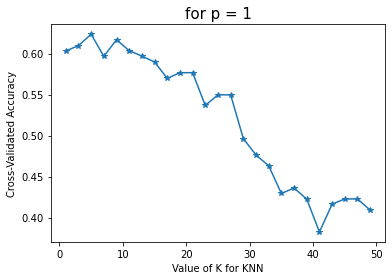

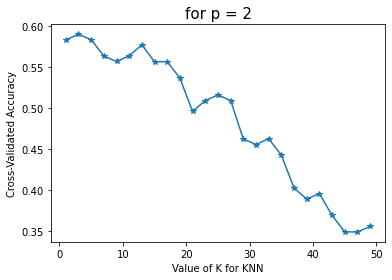

In [19]:
#calling the function
plot_for_best_parameter(x_train,y_train)

### Using GridSearchCV to find the best parameter

In [20]:
#calling the function
grid_search_cv(x_train,y_train)

{'n_neighbors': 5, 'p': 1}


### Building the model based on the best parameters

In [21]:
model = KNeighborsClassifier(n_neighbors=5,p=1)
model.fit(x_train, y_train)
results = cross_val_score(model, x_train, y_train, cv=5)
print(results.mean())

0.6236781609195402


In [22]:
# making predictions
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    24
2    24
7    11
5     4
6     2
dtype: int64

### Model Evaluation

#### 1. Training and testing score

In [23]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.7315
Test set score: 0.7846


#### 2. Accuracy of the model

In [24]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,preds)*100)

Accuracy_score 78.46153846153847


#### 3. Confusion Matrix

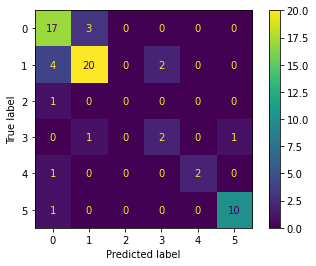

In [25]:
#calling the function
Conf_mat(y_test,preds)

#### 4. Classification Report

In [26]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.71      0.85      0.77        20
           2       0.83      0.77      0.80        26
           3       0.00      0.00      0.00         1
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       0.91      0.91      0.91        11

    accuracy                           0.78        65
   macro avg       0.66      0.62      0.63        65
weighted avg       0.78      0.78      0.78        65



#### 5. AUC and ROC



 ROC AUC score: 0.7821302735920223 




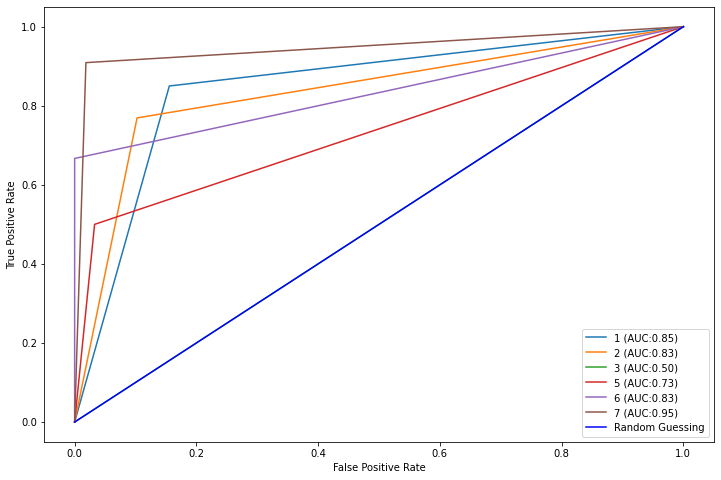

In [27]:
#calling the function
target= glass["Type"].unique()
roc_auc(target,y_test,preds)

# Data : Zoo

## Importing the data

In [28]:
zoo = pd.read_csv("D:\Study\Excelr DS\Assignments\AS-13-KNN\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Initial Analysis

In [29]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [30]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [31]:
zoo["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [32]:
zoo["animal name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

## Visualization

In [33]:
X1 = zoo.iloc[:,1:17]
Y1 = zoo.iloc[:,-1]

### 1. Correlation Plot:

Correlation Plot



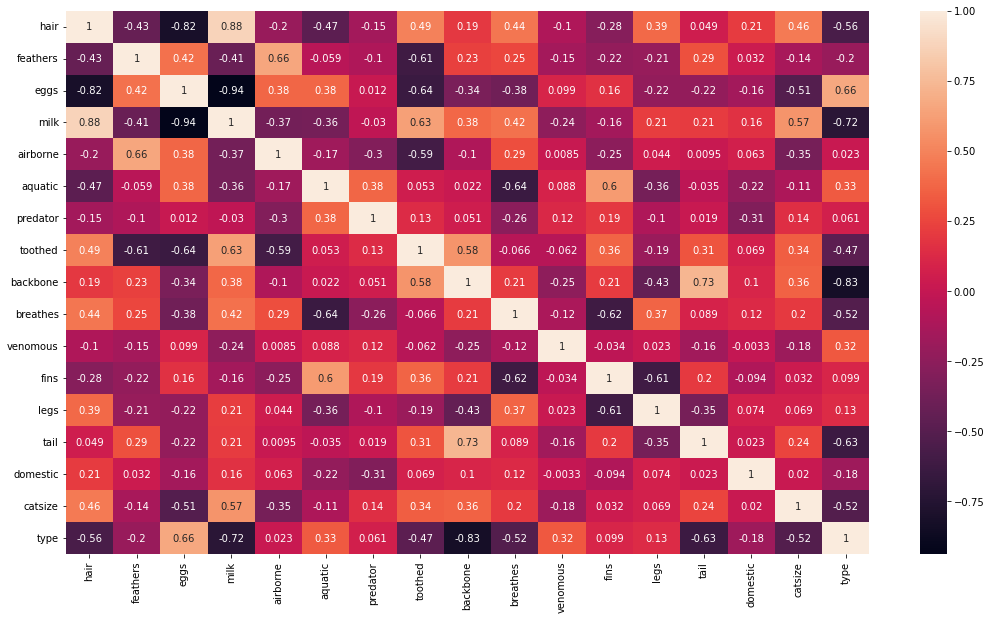

In [34]:
#calling the function
Create_Plots(zoo,X1,Y1,Type=1)

### 2. Plots showing individual comparison :

Individual Comparison



<Figure size 360x360 with 0 Axes>

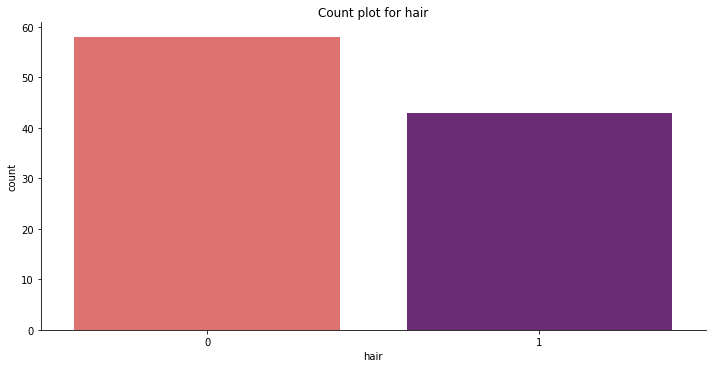

<Figure size 360x360 with 0 Axes>

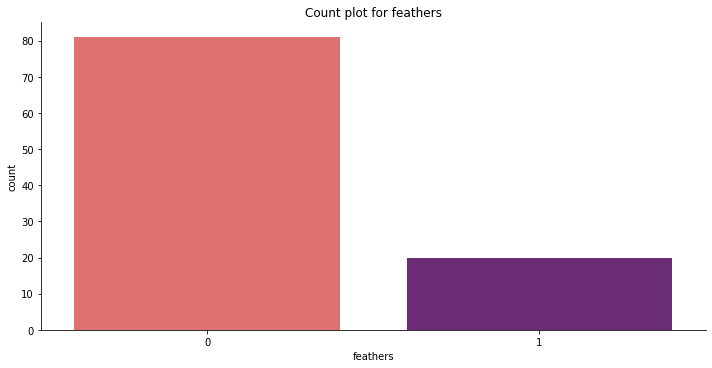

<Figure size 360x360 with 0 Axes>

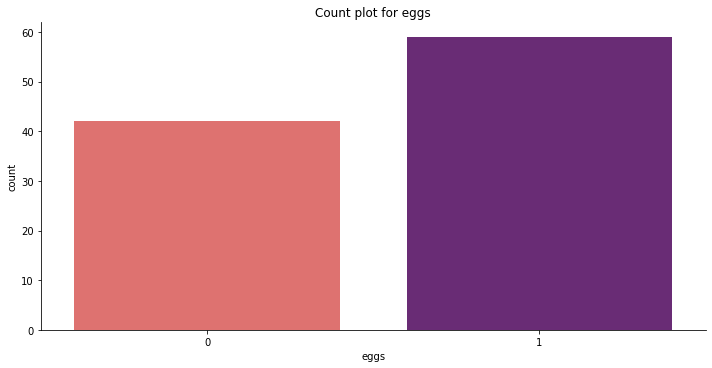

<Figure size 360x360 with 0 Axes>

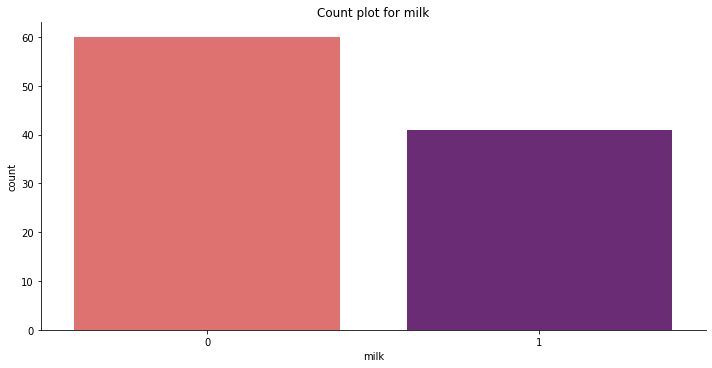

<Figure size 360x360 with 0 Axes>

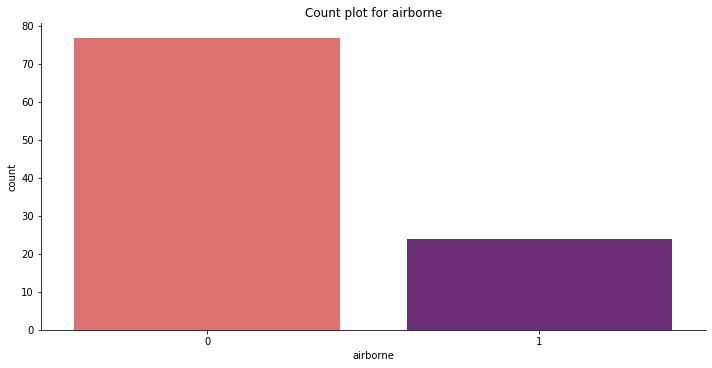

<Figure size 360x360 with 0 Axes>

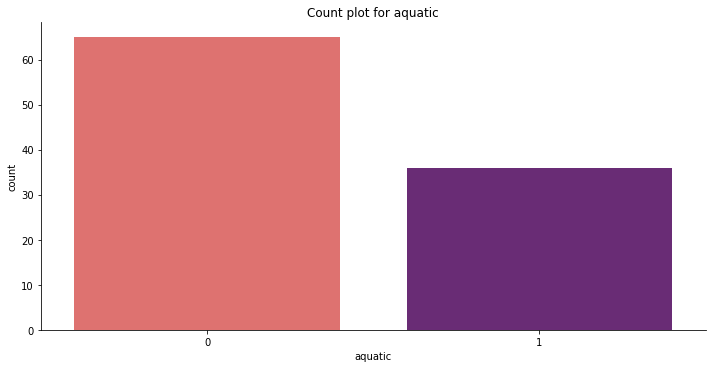

<Figure size 360x360 with 0 Axes>

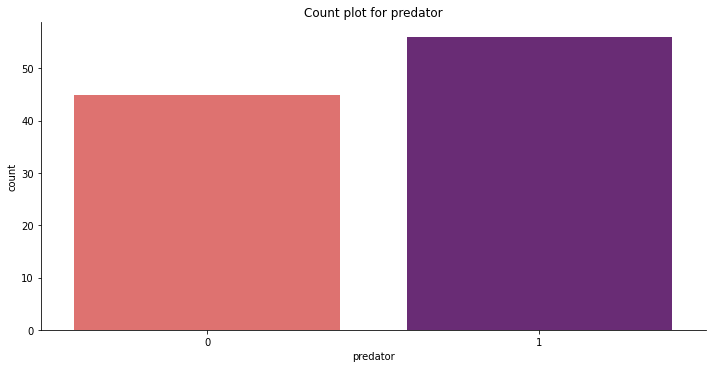

<Figure size 360x360 with 0 Axes>

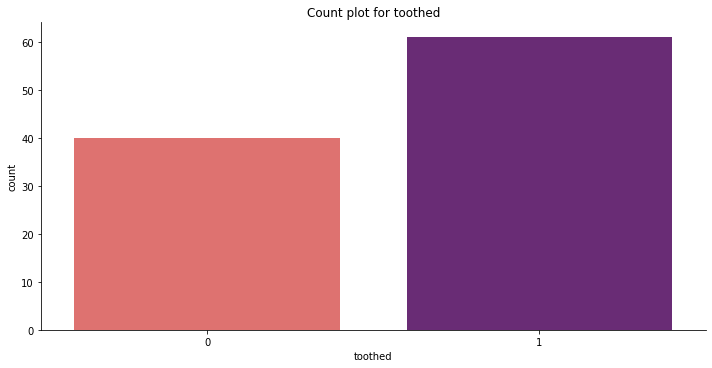

<Figure size 360x360 with 0 Axes>

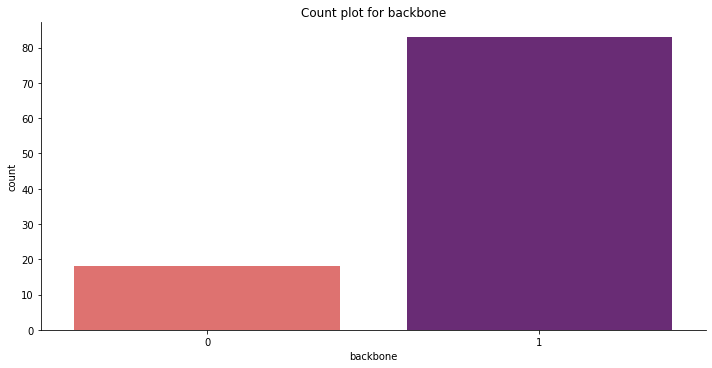

<Figure size 360x360 with 0 Axes>

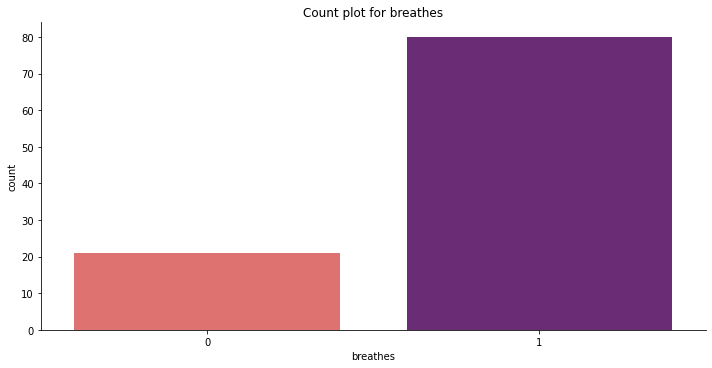

<Figure size 360x360 with 0 Axes>

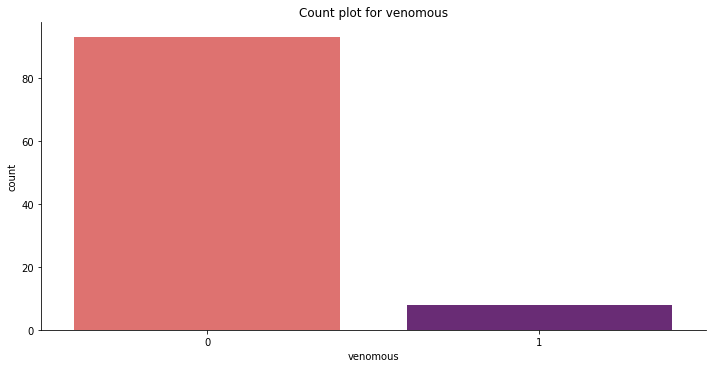

<Figure size 360x360 with 0 Axes>

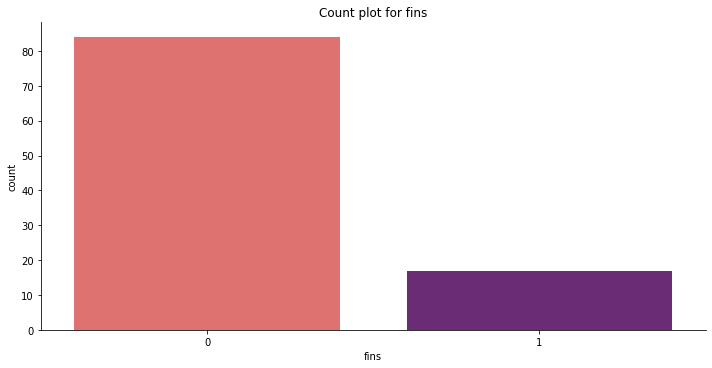

<Figure size 360x360 with 0 Axes>

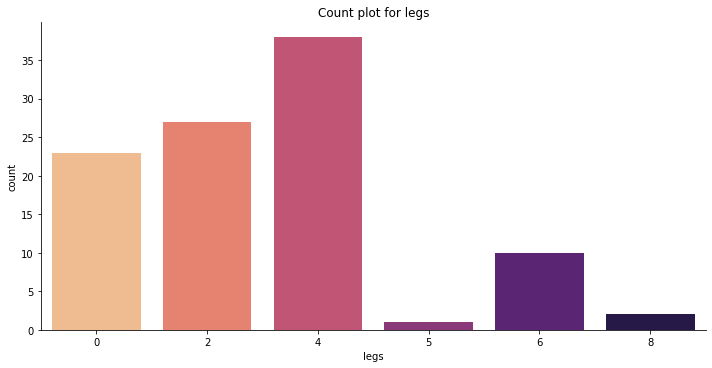

<Figure size 360x360 with 0 Axes>

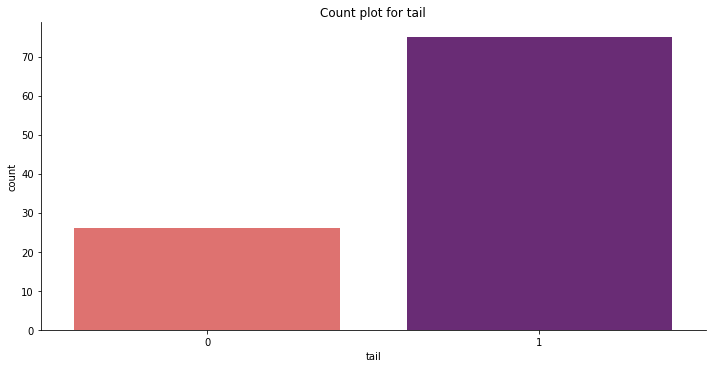

<Figure size 360x360 with 0 Axes>

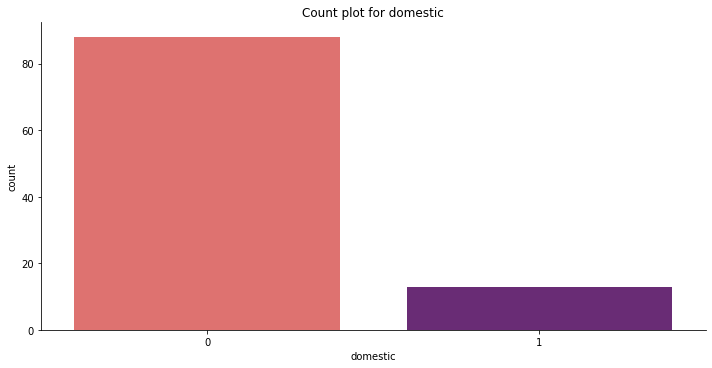

<Figure size 360x360 with 0 Axes>

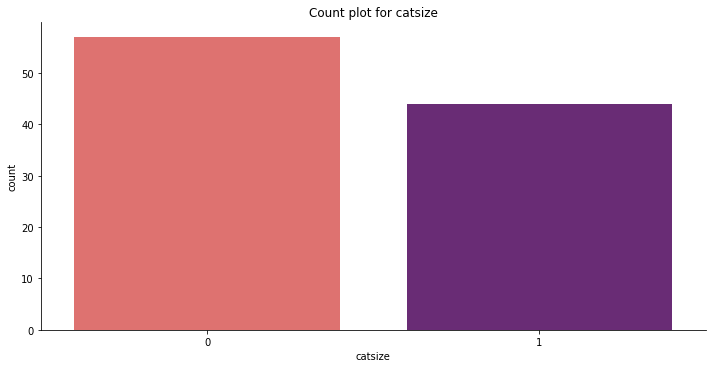

<Figure size 360x360 with 0 Axes>

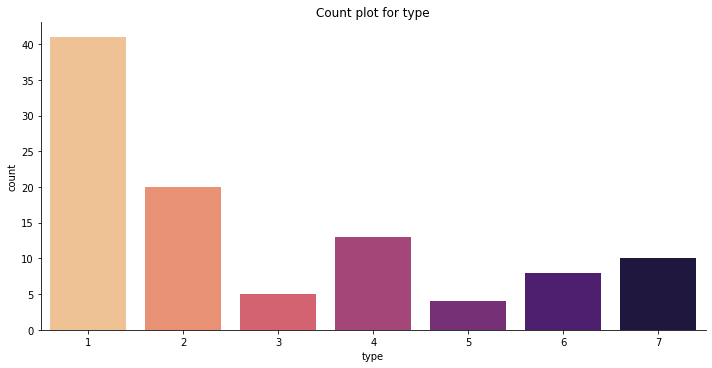

In [35]:
#calling the function
Create_Plots(zoo.iloc[:,1:],X1,Y1,Type=2,category=True)

### 3. Visualizing using tSne

Visualiztion using TSNE



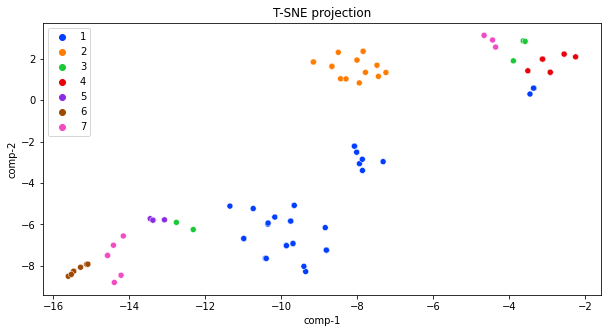

In [36]:
#calling the function
Create_Plots(zoo,X1,Y1,Type=3)

## Scaling the data

In [37]:
#calling the function
scaled_data1 = scale_data(zoo.iloc[:,1:])
scaled_data1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180,-0.875451
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595,1.514294
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595,1.992242


## Defining independent and dependent variables

In [38]:
x1  = scaled_data1.iloc[: , 0:16]
y1 = zoo.iloc[ :,-1]

## Splitting the data into training and testing

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1,test_size=0.30, random_state=50)

## Model building

We need to find the best parameters, hence we will use GridSearchCV
We shall tune 2 parameters, 
* n_neighburs : for the value of k (we will prefer odd values, to break the ties)
* p : for determing the metrics to be used to calculate the distance.
        p=1 : Manhattan distance
        p=2 : Eucledian distance

### Studying the best parameter using visualization

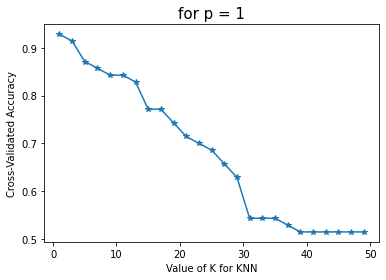

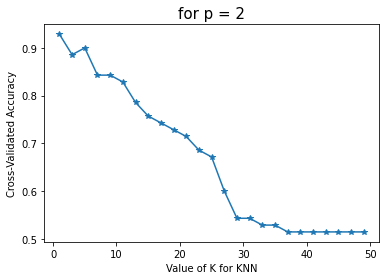

In [40]:
#calling the function
plot_for_best_parameter(X_train,Y_train)

### Using GridSearchCV to find the best parameter

In [41]:
#calling the function
grid_search_cv(X_train,Y_train)

{'n_neighbors': 1, 'p': 1}


### Building the model based on the best parameters

In [42]:
model1 = KNeighborsClassifier(n_neighbors=1,p=1)
model1.fit(X_train, Y_train)
results1 = cross_val_score(model1, X_train, Y_train, cv=5)
print(results1.mean())

0.9285714285714285


In [43]:
# making predictions
preds1 = model1.predict(X_test) # predicting on test data set 
pd.Series(preds1).value_counts() # getting the count of each category

4    8
2    7
1    5
6    5
7    4
5    1
3    1
dtype: int64

### Model Evaluation

#### 1. Training and testing score

In [44]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model1.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model1.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 1.0000


#### 2. Accuracy of the model

In [45]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(Y_test,preds1)*100)

Accuracy_score 100.0


#### 3. Confusion Matrix

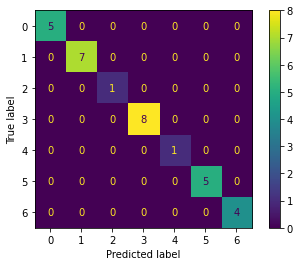

In [46]:
#calling the function
Conf_mat(Y_test,preds1)

#### 4. Classification Report

In [47]:
#calling the function
print(classification_report(Y_test,preds1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



#### 5. AUC and ROC



 ROC AUC score: 1.0 




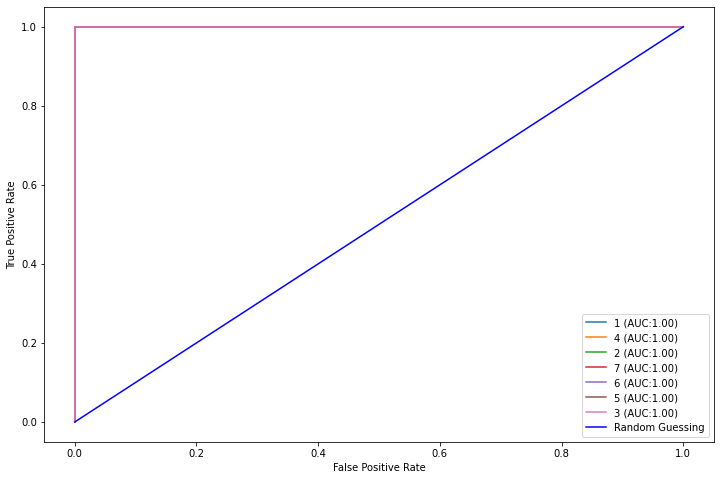

In [48]:
#calling the function
target1=zoo["type"].unique()
roc_auc(target1,Y_test,preds1)